In [1]:
# 调用库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# 混淆矩阵函数
def plot_cm(y, yp):

    from sklearn.metrics import confusion_matrix  # 导入混淆矩阵函数
    cm = confusion_matrix(y, yp)  # 混淆矩阵

    plt.figure()
    plt.matshow(cm, cmap=plt.cm.Greens)  # 画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
    plt.colorbar()  # 颜色标签

    for x in range(len(cm)):  # 数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x, y], xy=(
                x, y), horizontalalignment='center', verticalalignment='center')

    plt.ylabel('True label')  # 坐标轴标签
    plt.xlabel('Predicted label')  # 坐标轴标签
    return plt

#ROC曲线图
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [3]:
# 导入数据
data = pd.read_csv(r'C:\Users\DELL\Desktop\data_new.csv')
data = data.dropna()
data.head()

,L,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,WEIGHTED_SEG_KM,AVG_FLIGHT_COUNT,...,L1Y_BP_SUM,EP_SUM,ADD_Point_SUM,Eli_Add_Point_Sum,Points_Sum,Point_NotFlight,ADD_POINTS_SUM_YR_1,ADD_POINTS_SUM_YR_2,EXCHANGE_COUNT,result
0,90.200000,0.0,6,31.0,210,239560.0,234188.0,580717,558440.14,26.250,...,259111,74460,39992,114452,619760,50,3352,36640,34,0
1,86.566667,0.0,6,42.0,140,171483.0,167434.0,293678,367777.20,17.500,...,185122,41288,12000,53288,415768,33,0,12000,29,0
2,87.166667,0.0,6,40.0,135,163618.0,164982.0,283712,355966.50,16.875,...,182087,39711,15491,55202,406361,26,3491,12000,20,0
3,68.233333,0.0,5,64.0,23,116350.0,125500.0,281336,306900.88,2.875,...,151210,34890,0,34890,372204,12,0,0,11,1
4,60.533333,0.0,6,48.0,152,124560.0,130702.0,309928,300834.06,19.000,...,145396,42265,22704,64969,338813,39,0,22704,27,0


In [4]:
# 确定特征值和目标值
x = data.iloc[:, 0:28] # 这里根据你的数据量改变
y = data["result"]

In [5]:
#分割数据
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22, train_size=0.8)

In [6]:
# 特征工程(标准化)
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [7]:
# 随机森林
#estimator = RandomForestClassifier(min_samples_split=2,min_samples_leaf=1,n_estimators=100)
# 梯度上升树
estimator = GradientBoostingClassifier(
    loss='deviance',
    learning_rate=0.3,
    n_estimators=120,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=13,
    verbose=1)
estimator.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0480           43.40s
         2           0.9056           43.64s
         3           0.8129           44.56s
         4           0.7294           44.80s
         5           0.6670           45.57s
         6           0.6298           46.39s
         7           0.5985           46.16s
         8           0.5666           45.81s
         9           0.5392           45.53s
        10           0.5109           45.16s
        20           0.3833           41.06s
        30           0.3276           36.87s
        40           0.2882           32.75s
        50           0.2587           28.79s
        60           0.2362           24.55s
        70           0.2201           20.48s
        80           0.2084           16.44s
        90           0.1993           12.36s
       100           0.1900            8.23s


GradientBoostingClassifier(learning_rate=0.3, max_depth=5, max_features=13,
                           n_estimators=120, verbose=1)

In [8]:
'''参数重要性排序并画图'''
# feature_importances_  可以调取关于特征重要程度
importances = estimator.feature_importances_
x_columns = x.columns
indices = np.argsort(importances)[::-1]
x_columns_indices = []
for f in range(x_train.shape[1]):
    # 对于最后需要逆序排序，我认为是做了类似决策树回溯的取值，从叶子收敛
    # 到根，根部重要程度高于叶子。
    x_columns_indices.append(x_columns[indices[f]])
x_columns_indices

['Ration_L1Y_Flight_Count',
 'AVG_INTERVAL',
 'L1Y_Flight_Count',
 'Ration_P1Y_Flight_Count',
 'AVG_FLIGHT_COUNT',
 'BEGIN_TO_FIRST',
 'FLIGHT_COUNT',
 'SUM_YR_2',
 'L',
 'P1Y_Flight_Count',
 'L1Y_BP_SUM',
 'Points_Sum',
 'SEG_KM_SUM',
 'SUM_YR_1',
 'avg_discount',
 'WEIGHTED_SEG_KM',
 'FFP_TIER',
 'AVG_BP_SUM',
 'AGE',
 'P1Y_BP_SUM',
 'EP_SUM',
 'ADD_POINTS_SUM_YR_2',
 'Eli_Add_Point_Sum',
 'ADD_Point_SUM',
 'Point_NotFlight',
 'ADD_POINTS_SUM_YR_1',
 'EXCHANGE_COUNT',
 'GENDER']

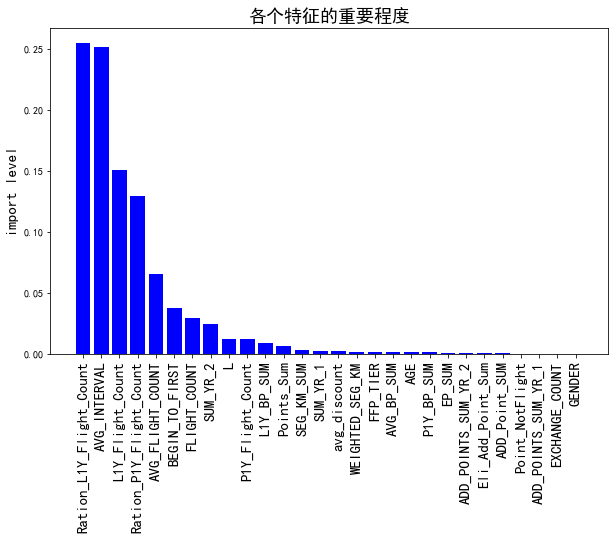

In [9]:
# 可视化
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10, 6))
plt.title("各个特征的重要程度", fontsize=18)
plt.ylabel("import level", fontsize=15, rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='blue', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=90, fontsize=15)

'''保存图像在这里插入代码'''
plt.show()